In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Final Year Research/Dataset/Oneplus 5T/Level 04/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    #print(file)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_green = np.array([30, 0, 0])
    high_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    res = cv2.bitwise_and(rgbImage,rgbImage, mask= mask)

    image1=cv2.resize(res, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image1=np.array(image1)
    image1 = image1.astype('float32')
    image1 /= 255 
    img_data_array.append(image1)
    class_name.append(4)
    i+=1
    #if(i==10):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)


[array([[[0.07450981, 0.16862746, 0.02352941],
        [0.09019608, 0.2       , 0.03529412],
        [0.05882353, 0.16470589, 0.01960784],
        ...,
        [0.46666667, 0.60784316, 0.3764706 ],
        [0.5882353 , 0.74509805, 0.34509805],
        [0.19215687, 0.30980393, 0.08627451]],

       [[0.05882353, 0.15294118, 0.01960784],
        [0.06666667, 0.1764706 , 0.02352941],
        [0.08235294, 0.19215687, 0.03137255],
        ...,
        [0.7764706 , 0.8862745 , 0.65882355],
        [0.5019608 , 0.6627451 , 0.2784314 ],
        [0.31764707, 0.48235294, 0.14901961]],

       [[0.16078432, 0.3372549 , 0.05490196],
        [0.05098039, 0.14509805, 0.01960784],
        [0.05882353, 0.16078432, 0.01960784],
        ...,
        [0.7254902 , 0.84705883, 0.5921569 ],
        [0.5254902 , 0.69411767, 0.23921569],
        [0.5411765 , 0.72156864, 0.28627452]],

       ...,

       [[0.43137255, 0.5882353 , 0.2627451 ],
        [0.6156863 , 0.75686276, 0.40784314],
        [0.5647059 , 

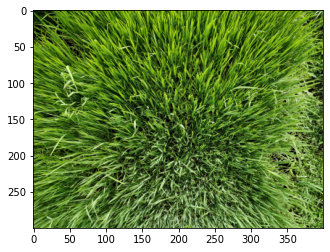

In [62]:
print(img_data)
print(class_name)
plt.imshow(img_data[0])
plt.show()
#converting the list to numpy array and saving it to a file using #numpy.save
#np.save(os.path.join(path,'features'),np.array(training_data))
#with open('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy', 'w') as f:
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy',np.array(img_data))
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/labeldata.npy',np.array(class_name))

In [66]:
print(class_name)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


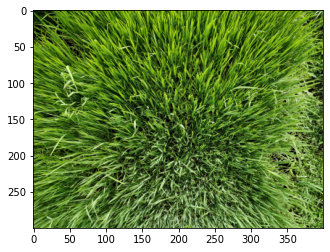

In [64]:
#loading the saved file once again
saved = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy")
plt.imshow(saved[0])
plt.show()